# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

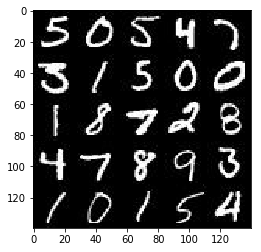

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

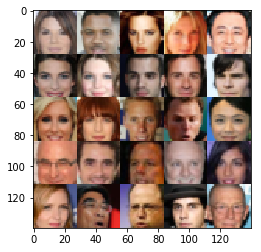

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name = 'input_z')
    learning_rate = tf.placeholder(tf.float32, name = 'learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    stddev = 0.02
    
    with tf.variable_scope('discriminator', reuse = reuse):
        # Architecture:
        #     Input: 28x28x3
        #     Layer 1: conv2d, 14x14x32
        #     Layer 2: conv2d, 7x7x64
        #     Layer 3: conv2d, 4x4x128
        #     Layer 4: conv2d, 2x2x256
        #     Layer 5: flatten, 1x1024
        #     Calculate logits and prediction
        
        # Input: 28x28x3
        x1 = images
#         print('x1.shape is ', x1.shape)
        
        # Layer 1: 14x14x32
        layer_1 = tf.layers.conv2d(inputs = x1, 
                                   filters = 32, 
                                   kernel_size = [5, 5],
                                   strides = 2, 
                                   padding = 'same',
                                   kernel_initializer = tf.random_normal_initializer(stddev = stddev)
                                  )
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
#         print('layer_1.shape is ', layer_1.shape)
        
        # Layer 2: 7x7x64
        layer_2 = tf.layers.conv2d(inputs = layer_1, 
                                   filters = 64, 
                                   kernel_size = [5, 5],
                                   strides = 2, 
                                   padding = 'same',
                                   kernel_initializer = tf.random_normal_initializer(stddev = stddev)
                                  )
        layer_2 = tf.layers.batch_normalization(layer_2, training = True)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
#         print('layer_2.shape is ', layer_2.shape)
        
        # Layer 3: 4x4x128
        layer_3 = tf.layers.conv2d(inputs = layer_2, 
                                   filters = 128, 
                                   kernel_size = [5, 5],
                                   strides = 2, 
                                   padding = 'same',
                                   kernel_initializer = tf.random_normal_initializer(stddev = stddev)
                                  )
        layer_3 = tf.layers.batch_normalization(layer_3, training = True)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
#         print('layer_3.shape is ', layer_3.shape)
        
        # Layer 4: 2x2x256
        layer_4 = tf.layers.conv2d(inputs = layer_3, 
                                   filters = 256, 
                                   kernel_size = [5, 5],
                                   strides = 2, 
                                   padding = 'same',
                                   kernel_initializer = tf.random_normal_initializer(stddev = stddev)
                                  )
        layer_4 = tf.layers.batch_normalization(layer_4, training = True)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
#         print('layer_4.shape is ', layer_4.shape)
        
        # Layer 5: 1x1024
        layer_5 = tf.reshape(layer_4, (-1, 2 * 2 * 256))
#         print('layer_5.shape is ', layer_5.shape)
        
        # Calculate logits
        logits = tf.layers.dense(inputs = layer_5, 
                                 units = 1, 
                                 kernel_initializer = tf.random_normal_initializer(stddev = stddev),
                                )
        # Apply dropout layer
        logits = tf.layers.dropout(logits, rate = 0.5)
        
        # Prediction
        out = tf.sigmoid(logits)

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    alpha = 0.1
    stddev = 0.02
#     print('reuse is', reuse)
    
    with tf.variable_scope('generator', reuse = reuse):
        # Architecture:
        #     Input: 7x7x256
        #     Layer 1: fully connected layer, 4x4x512
        #     Layer 2: conv2d, 7x7x128
        #     Layer 3: conv2d, 14x14x64
        #     Layer 4: conv2d, 28x28x32
        #     Calculate logits and prediction
        
        # Input: 7x7x256
        x1 = z
#         print('x1.shape is', x1.shape)
        
        # Layer 1: 4x4x512
        # Fully connected layer
        layer_1 = tf.layers.dense(x1, 4 * 4 * 512)
        # Reshape it to start the convolutional stack
        layer_1 = tf.reshape(layer_1, (-1, 4, 4, 512))
        layer_1 = tf.layers.batch_normalization(layer_1, training = is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
#         print('layer_1.shape is', layer_1.shape)
        
        # Layer 2: 8x8x128
        layer_2 = tf.layers.conv2d_transpose(inputs = layer_1, 
                                             filters = 128, 
                                             kernel_size = [4, 4],
                                             strides = 1,
                                             padding = 'valid',
                                             kernel_initializer = tf.random_normal_initializer(stddev = stddev)
                                            )
        layer_2 = tf.layers.batch_normalization(layer_2, training = is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
#         print('layer_2.shape is', layer_2.shape)
        
        # Layer 3: 16x16x64
        layer_3 = tf.layers.conv2d_transpose(inputs = layer_2, 
                                             filters = 64, 
                                             kernel_size = [5, 5],
                                             strides = 2,
                                             padding = 'same',
                                             kernel_initializer = tf.random_normal_initializer(stddev = stddev)
                                            )
        layer_3 = tf.layers.batch_normalization(layer_3, training = is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
#         print('layer_3.shape is', layer_3.shape)
        
        # Layer 4: 32x32x32
        layer_4 = tf.layers.conv2d_transpose(inputs = layer_3, 
                                             filters = 32, 
                                             kernel_size = [5, 5],
                                             strides = 2,
                                             padding = 'same',
                                             kernel_initializer = tf.random_normal_initializer(stddev = stddev)
                                            )
        layer_4 = tf.layers.batch_normalization(layer_4, training = is_train)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
#         print('layer_4.shape is', layer_4.shape)
        
        # Calculate logits： 28x28x5
        logits = tf.layers.conv2d_transpose(inputs = layer_4,
                                            filters = out_channel_dim,
                                            kernel_size = [3, 3],
                                            strides = 1,
                                            padding = 'same',
                                            kernel_initializer = tf.random_normal_initializer(stddev = stddev)
                                           )
#         print('out_channel_dim is ', out_channel_dim)
#         print('logits.shape is', logits.shape)
        
        # Prediction
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
import numpy as np

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    # Generate the fake image
    input_fake = generator(input_z, out_channel_dim)
    
    # Calculate losses from discriminator
    d_output_real, d_logits_real = discriminator(input_real)
    d_output_fake, d_logits_fake = discriminator(input_fake, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real,
                                                                         labels = tf.ones_like(d_logits_real) * 0.9
#                                                                          labels = tf.ones_like(d_logits_real) * np.random.uniform(0.7, 1.2)
                                                                        )
                                )
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake,
                                                                         labels = tf.zeros_like(d_logits_real)
#                                                                          labels = tf.ones_like(d_logits_real) * np.random.uniform(0.0, 0.3)
                                                                        )
                                )
    
    # Calculate losses for the discriminator and generator
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake,
                                                                    labels = tf.ones_like(d_logits_fake)
                                                                   )
                           )
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss,
                                                                                    var_list = g_vars)
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss,
                                                                                    var_list = d_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Create model inputs
    input_real, input_z, input_learning_rate = model_inputs(image_width = data_shape[1], 
                                                        image_height = data_shape[2], 
                                                        image_channels = data_shape[3], 
                                                        z_dim = z_dim
                                                       )
    # Create model loss
    d_loss, g_loss = model_loss(input_real, 
                                input_z, 
                                out_channel_dim = data_shape[3]
                               )
    # Create model optimizer
    d_train_opt, g_train_opt = model_opt(d_loss, 
                                         g_loss, 
                                         learning_rate, 
                                         beta1
                                        )
    
    # Create counter for printing result and showing genrated image
    counter = 0
    counts_per_print = 10
    counts_per_show = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                # Get images, resahpe and rescale to pass to D
#                 print('batch_size is ', batch_size)
#                 print('batch_images.shape is ', batch_images.shape)
#                 print('batch_images[0].shape is ', batch_images[0].shape)
#                 batch_images = batch_images.reshape((batch_size, 784))
#                 print('batch_images.shape is ', batch_images.shape)
                batch_images *= 2
#                 batch_images = batch_images * 2 - 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, 
                             feed_dict = {input_real: batch_images,
                                          input_z: batch_z,
                                          input_learning_rate: learning_rate
                                         }
                            )
                
                _ = sess.run(g_train_opt, 
                             feed_dict = {#input_real: batch_images,
                                          input_z: batch_z,
                                          input_learning_rate: learning_rate
                                         }
                            )
                
                counter += 1
                
                # Print result
                if 0 == counter % counts_per_print:    
                    # At the end of 100 batches, get the losses and print them out
                    train_loss_d = sess.run(d_loss,
                                            {input_z: batch_z,
                                             input_real: batch_images
                                            }
                                           )
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g)
                         )
                
                # Show generated image
                if 0 == counter % counts_per_show:
                    show_generator_output(sess,
                                          25,
                                          input_z,
                                          data_shape[3],
                                          data_image_mode
                                         )

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [13]:
import time

In [14]:
t0 = time.time()

Epoch 1/2... Discriminator Loss: 0.8786... Generator Loss: 1.0861
Epoch 1/2... Discriminator Loss: 1.0110... Generator Loss: 1.0053
Epoch 1/2... Discriminator Loss: 0.8371... Generator Loss: 1.2729
Epoch 1/2... Discriminator Loss: 0.7532... Generator Loss: 1.3259
Epoch 1/2... Discriminator Loss: 0.4783... Generator Loss: 2.3715
Epoch 1/2... Discriminator Loss: 0.5383... Generator Loss: 2.0404
Epoch 1/2... Discriminator Loss: 0.5613... Generator Loss: 1.8806
Epoch 1/2... Discriminator Loss: 0.3739... Generator Loss: 3.5609
Epoch 1/2... Discriminator Loss: 0.4216... Generator Loss: 2.8662
Epoch 1/2... Discriminator Loss: 0.4024... Generator Loss: 2.9862


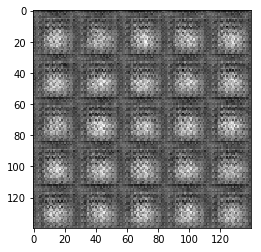

Epoch 1/2... Discriminator Loss: 0.3873... Generator Loss: 3.2289
Epoch 1/2... Discriminator Loss: 0.4132... Generator Loss: 2.6696
Epoch 1/2... Discriminator Loss: 1.9401... Generator Loss: 0.2963
Epoch 1/2... Discriminator Loss: 0.5086... Generator Loss: 2.5346
Epoch 1/2... Discriminator Loss: 0.3618... Generator Loss: 4.3760
Epoch 1/2... Discriminator Loss: 0.3763... Generator Loss: 3.3585
Epoch 1/2... Discriminator Loss: 0.4365... Generator Loss: 2.7536
Epoch 1/2... Discriminator Loss: 0.4303... Generator Loss: 3.0427
Epoch 1/2... Discriminator Loss: 0.3781... Generator Loss: 4.4560
Epoch 1/2... Discriminator Loss: 0.7277... Generator Loss: 1.5230


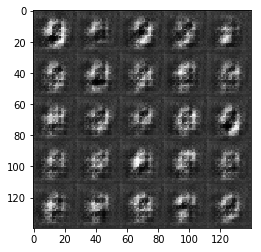

Epoch 1/2... Discriminator Loss: 0.5624... Generator Loss: 1.9493
Epoch 1/2... Discriminator Loss: 0.9353... Generator Loss: 4.8811
Epoch 1/2... Discriminator Loss: 0.6441... Generator Loss: 1.6095
Epoch 1/2... Discriminator Loss: 0.5137... Generator Loss: 2.6057
Epoch 1/2... Discriminator Loss: 0.7476... Generator Loss: 2.7668
Epoch 1/2... Discriminator Loss: 0.6191... Generator Loss: 2.2464
Epoch 1/2... Discriminator Loss: 0.7603... Generator Loss: 1.3233
Epoch 1/2... Discriminator Loss: 0.9556... Generator Loss: 0.9130
Epoch 1/2... Discriminator Loss: 1.0680... Generator Loss: 3.0342
Epoch 1/2... Discriminator Loss: 0.7308... Generator Loss: 2.2944


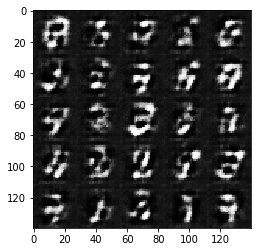

Epoch 1/2... Discriminator Loss: 1.3488... Generator Loss: 0.5394
Epoch 1/2... Discriminator Loss: 0.8047... Generator Loss: 1.2477
Epoch 1/2... Discriminator Loss: 0.8021... Generator Loss: 1.1298
Epoch 1/2... Discriminator Loss: 0.6535... Generator Loss: 1.4983
Epoch 1/2... Discriminator Loss: 0.9787... Generator Loss: 3.4295
Epoch 1/2... Discriminator Loss: 0.6177... Generator Loss: 1.8531
Epoch 1/2... Discriminator Loss: 0.5524... Generator Loss: 2.2486
Epoch 1/2... Discriminator Loss: 0.7436... Generator Loss: 1.6597
Epoch 1/2... Discriminator Loss: 0.7558... Generator Loss: 2.3927
Epoch 1/2... Discriminator Loss: 0.6717... Generator Loss: 1.7780


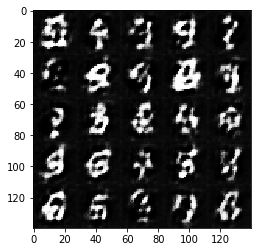

Epoch 1/2... Discriminator Loss: 0.7683... Generator Loss: 2.5039
Epoch 1/2... Discriminator Loss: 0.9529... Generator Loss: 0.8690
Epoch 1/2... Discriminator Loss: 0.6247... Generator Loss: 1.8311
Epoch 1/2... Discriminator Loss: 1.2663... Generator Loss: 0.6199
Epoch 1/2... Discriminator Loss: 0.7396... Generator Loss: 1.8977
Epoch 1/2... Discriminator Loss: 1.2559... Generator Loss: 0.6444
Epoch 1/2... Discriminator Loss: 0.5962... Generator Loss: 2.0681
Epoch 1/2... Discriminator Loss: 1.3178... Generator Loss: 0.5587
Epoch 1/2... Discriminator Loss: 0.6996... Generator Loss: 1.6200
Epoch 1/2... Discriminator Loss: 0.8378... Generator Loss: 1.2212


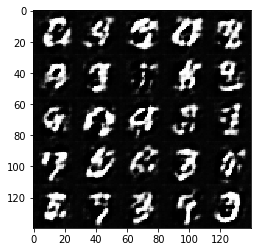

Epoch 1/2... Discriminator Loss: 0.6432... Generator Loss: 1.7041
Epoch 1/2... Discriminator Loss: 0.9541... Generator Loss: 0.9120
Epoch 1/2... Discriminator Loss: 1.1340... Generator Loss: 0.7304
Epoch 1/2... Discriminator Loss: 0.7993... Generator Loss: 2.2766
Epoch 1/2... Discriminator Loss: 0.7374... Generator Loss: 1.6749
Epoch 1/2... Discriminator Loss: 0.8162... Generator Loss: 1.1767
Epoch 1/2... Discriminator Loss: 0.8837... Generator Loss: 1.0461
Epoch 1/2... Discriminator Loss: 0.8349... Generator Loss: 1.0724
Epoch 1/2... Discriminator Loss: 0.7354... Generator Loss: 1.4914
Epoch 1/2... Discriminator Loss: 0.8611... Generator Loss: 1.0863


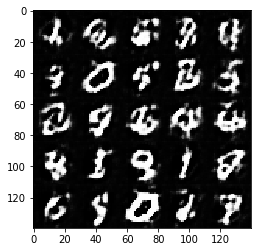

Epoch 1/2... Discriminator Loss: 0.6428... Generator Loss: 1.7248
Epoch 1/2... Discriminator Loss: 0.8316... Generator Loss: 1.8927
Epoch 1/2... Discriminator Loss: 0.8849... Generator Loss: 1.0602
Epoch 1/2... Discriminator Loss: 0.7169... Generator Loss: 1.8731
Epoch 1/2... Discriminator Loss: 0.7159... Generator Loss: 1.4800
Epoch 1/2... Discriminator Loss: 1.0983... Generator Loss: 0.7426
Epoch 1/2... Discriminator Loss: 0.7525... Generator Loss: 1.6827
Epoch 1/2... Discriminator Loss: 1.1483... Generator Loss: 2.7194
Epoch 1/2... Discriminator Loss: 0.9108... Generator Loss: 2.0147
Epoch 1/2... Discriminator Loss: 1.3525... Generator Loss: 0.5625


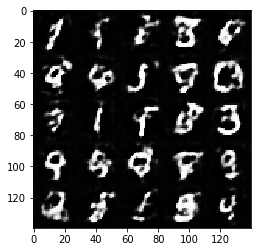

Epoch 1/2... Discriminator Loss: 0.9714... Generator Loss: 0.8942
Epoch 1/2... Discriminator Loss: 0.8150... Generator Loss: 1.3192
Epoch 1/2... Discriminator Loss: 0.8202... Generator Loss: 1.1207
Epoch 1/2... Discriminator Loss: 1.0237... Generator Loss: 0.8211
Epoch 1/2... Discriminator Loss: 0.7934... Generator Loss: 1.6648
Epoch 1/2... Discriminator Loss: 0.9432... Generator Loss: 1.0043
Epoch 1/2... Discriminator Loss: 0.8335... Generator Loss: 1.9633
Epoch 1/2... Discriminator Loss: 1.6232... Generator Loss: 0.3777
Epoch 1/2... Discriminator Loss: 0.8083... Generator Loss: 1.2089
Epoch 1/2... Discriminator Loss: 1.5741... Generator Loss: 0.4025


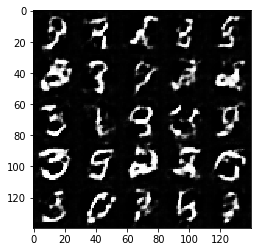

Epoch 1/2... Discriminator Loss: 0.8302... Generator Loss: 1.2815
Epoch 1/2... Discriminator Loss: 1.0413... Generator Loss: 0.7986
Epoch 1/2... Discriminator Loss: 1.1523... Generator Loss: 0.7512
Epoch 1/2... Discriminator Loss: 1.0972... Generator Loss: 0.8236
Epoch 1/2... Discriminator Loss: 1.0697... Generator Loss: 0.8915
Epoch 1/2... Discriminator Loss: 1.1389... Generator Loss: 0.7116
Epoch 1/2... Discriminator Loss: 0.7967... Generator Loss: 1.7165
Epoch 1/2... Discriminator Loss: 1.0449... Generator Loss: 0.8432
Epoch 1/2... Discriminator Loss: 1.0519... Generator Loss: 0.8446
Epoch 1/2... Discriminator Loss: 0.8004... Generator Loss: 1.6747


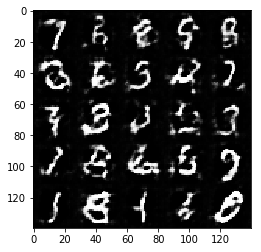

Epoch 1/2... Discriminator Loss: 1.1852... Generator Loss: 0.6437
Epoch 1/2... Discriminator Loss: 0.9258... Generator Loss: 1.3584
Epoch 1/2... Discriminator Loss: 0.8231... Generator Loss: 1.6417
Epoch 2/2... Discriminator Loss: 0.9078... Generator Loss: 1.4953
Epoch 2/2... Discriminator Loss: 1.1320... Generator Loss: 0.7233
Epoch 2/2... Discriminator Loss: 1.0796... Generator Loss: 0.7640
Epoch 2/2... Discriminator Loss: 0.9128... Generator Loss: 1.0993
Epoch 2/2... Discriminator Loss: 1.2503... Generator Loss: 2.3911
Epoch 2/2... Discriminator Loss: 0.8148... Generator Loss: 1.2178
Epoch 2/2... Discriminator Loss: 1.1645... Generator Loss: 0.7086


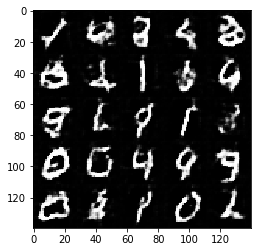

Epoch 2/2... Discriminator Loss: 1.0868... Generator Loss: 0.7671
Epoch 2/2... Discriminator Loss: 1.0136... Generator Loss: 0.8110
Epoch 2/2... Discriminator Loss: 0.8908... Generator Loss: 1.4261
Epoch 2/2... Discriminator Loss: 0.8656... Generator Loss: 1.2395
Epoch 2/2... Discriminator Loss: 0.9211... Generator Loss: 1.1262
Epoch 2/2... Discriminator Loss: 1.3299... Generator Loss: 0.5392
Epoch 2/2... Discriminator Loss: 1.0411... Generator Loss: 0.8513
Epoch 2/2... Discriminator Loss: 1.0030... Generator Loss: 1.6279
Epoch 2/2... Discriminator Loss: 0.8761... Generator Loss: 1.5020
Epoch 2/2... Discriminator Loss: 0.9283... Generator Loss: 1.3817


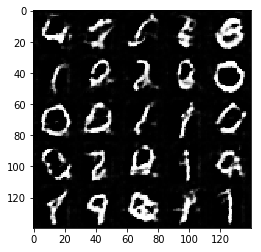

Epoch 2/2... Discriminator Loss: 0.9212... Generator Loss: 0.9964
Epoch 2/2... Discriminator Loss: 1.1694... Generator Loss: 0.6525
Epoch 2/2... Discriminator Loss: 0.9670... Generator Loss: 0.8871
Epoch 2/2... Discriminator Loss: 0.8749... Generator Loss: 1.4840
Epoch 2/2... Discriminator Loss: 1.4950... Generator Loss: 0.4460
Epoch 2/2... Discriminator Loss: 1.2560... Generator Loss: 0.5940
Epoch 2/2... Discriminator Loss: 0.9306... Generator Loss: 1.7728
Epoch 2/2... Discriminator Loss: 0.8933... Generator Loss: 1.4809
Epoch 2/2... Discriminator Loss: 1.0753... Generator Loss: 1.8145
Epoch 2/2... Discriminator Loss: 0.8403... Generator Loss: 1.2121


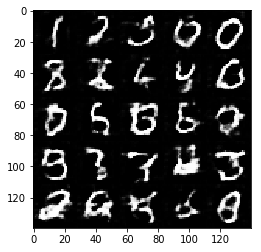

Epoch 2/2... Discriminator Loss: 0.8282... Generator Loss: 1.8351
Epoch 2/2... Discriminator Loss: 1.0395... Generator Loss: 2.2216
Epoch 2/2... Discriminator Loss: 0.8990... Generator Loss: 1.2229
Epoch 2/2... Discriminator Loss: 1.0110... Generator Loss: 0.8553
Epoch 2/2... Discriminator Loss: 1.1192... Generator Loss: 0.7082
Epoch 2/2... Discriminator Loss: 1.0598... Generator Loss: 0.7380
Epoch 2/2... Discriminator Loss: 1.3246... Generator Loss: 0.5184
Epoch 2/2... Discriminator Loss: 1.0935... Generator Loss: 0.7416
Epoch 2/2... Discriminator Loss: 0.9480... Generator Loss: 1.0447
Epoch 2/2... Discriminator Loss: 0.9702... Generator Loss: 0.8899


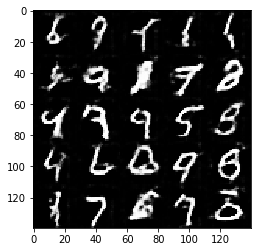

Epoch 2/2... Discriminator Loss: 0.8714... Generator Loss: 1.1594
Epoch 2/2... Discriminator Loss: 1.0656... Generator Loss: 1.8542
Epoch 2/2... Discriminator Loss: 0.8726... Generator Loss: 1.1441
Epoch 2/2... Discriminator Loss: 0.8842... Generator Loss: 1.0563
Epoch 2/2... Discriminator Loss: 0.9702... Generator Loss: 1.9078
Epoch 2/2... Discriminator Loss: 0.9199... Generator Loss: 1.1055
Epoch 2/2... Discriminator Loss: 0.8112... Generator Loss: 1.2425
Epoch 2/2... Discriminator Loss: 0.8629... Generator Loss: 1.6201
Epoch 2/2... Discriminator Loss: 0.7079... Generator Loss: 1.7289
Epoch 2/2... Discriminator Loss: 1.0826... Generator Loss: 0.7329


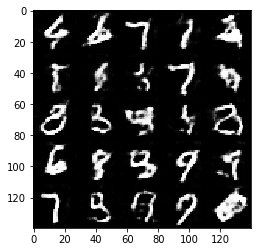

Epoch 2/2... Discriminator Loss: 0.7826... Generator Loss: 1.5683
Epoch 2/2... Discriminator Loss: 1.0570... Generator Loss: 0.8817
Epoch 2/2... Discriminator Loss: 1.3351... Generator Loss: 0.4963
Epoch 2/2... Discriminator Loss: 1.1093... Generator Loss: 0.7615
Epoch 2/2... Discriminator Loss: 0.9158... Generator Loss: 1.3897
Epoch 2/2... Discriminator Loss: 0.8390... Generator Loss: 1.3643
Epoch 2/2... Discriminator Loss: 1.1477... Generator Loss: 0.6993
Epoch 2/2... Discriminator Loss: 0.8790... Generator Loss: 1.5952
Epoch 2/2... Discriminator Loss: 0.9281... Generator Loss: 1.4010
Epoch 2/2... Discriminator Loss: 1.1588... Generator Loss: 1.2257


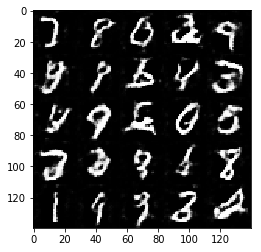

Epoch 2/2... Discriminator Loss: 0.8060... Generator Loss: 1.2616
Epoch 2/2... Discriminator Loss: 1.7533... Generator Loss: 0.3238
Epoch 2/2... Discriminator Loss: 0.9594... Generator Loss: 0.8819
Epoch 2/2... Discriminator Loss: 0.9794... Generator Loss: 0.8548
Epoch 2/2... Discriminator Loss: 0.9408... Generator Loss: 0.9412
Epoch 2/2... Discriminator Loss: 0.8706... Generator Loss: 1.1031
Epoch 2/2... Discriminator Loss: 1.2691... Generator Loss: 0.5619
Epoch 2/2... Discriminator Loss: 0.9884... Generator Loss: 0.8244
Epoch 2/2... Discriminator Loss: 0.8931... Generator Loss: 1.9006
Epoch 2/2... Discriminator Loss: 0.9666... Generator Loss: 1.2922


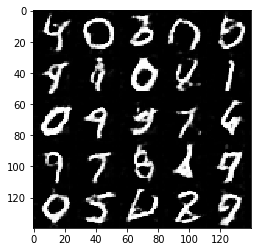

Epoch 2/2... Discriminator Loss: 1.0156... Generator Loss: 0.8700
Epoch 2/2... Discriminator Loss: 0.7925... Generator Loss: 1.2263
Epoch 2/2... Discriminator Loss: 0.9358... Generator Loss: 1.2401
Epoch 2/2... Discriminator Loss: 0.8104... Generator Loss: 1.4486
Epoch 2/2... Discriminator Loss: 1.1470... Generator Loss: 1.8503
Epoch 2/2... Discriminator Loss: 1.4630... Generator Loss: 0.4439
Epoch 2/2... Discriminator Loss: 0.9577... Generator Loss: 0.9367
Epoch 2/2... Discriminator Loss: 1.2334... Generator Loss: 0.5866
Epoch 2/2... Discriminator Loss: 1.2220... Generator Loss: 0.6247
Epoch 2/2... Discriminator Loss: 0.7913... Generator Loss: 1.4624


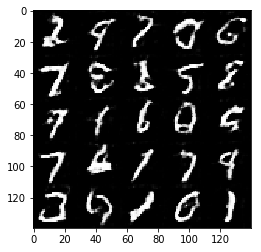

Epoch 2/2... Discriminator Loss: 1.1158... Generator Loss: 0.7056
Epoch 2/2... Discriminator Loss: 1.2480... Generator Loss: 0.5605
Epoch 2/2... Discriminator Loss: 0.9010... Generator Loss: 1.0138
Epoch 2/2... Discriminator Loss: 0.8423... Generator Loss: 1.7154
Epoch 2/2... Discriminator Loss: 0.9082... Generator Loss: 1.6746
Epoch 2/2... Discriminator Loss: 0.7814... Generator Loss: 1.5843
Epoch 2/2... Discriminator Loss: 1.0251... Generator Loss: 0.7991
Epoch 2/2... Discriminator Loss: 1.1901... Generator Loss: 0.6275
Epoch 2/2... Discriminator Loss: 0.9863... Generator Loss: 1.1069
Epoch 2/2... Discriminator Loss: 0.9755... Generator Loss: 2.0475


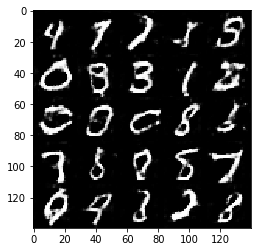

Epoch 2/2... Discriminator Loss: 1.2634... Generator Loss: 0.5595
Epoch 2/2... Discriminator Loss: 0.9889... Generator Loss: 1.1015
Epoch 2/2... Discriminator Loss: 0.8481... Generator Loss: 1.3966
Epoch 2/2... Discriminator Loss: 1.0578... Generator Loss: 1.0481
Epoch 2/2... Discriminator Loss: 1.0641... Generator Loss: 0.7750
Epoch 2/2... Discriminator Loss: 0.8669... Generator Loss: 1.5923
Epoch 2/2... Discriminator Loss: 1.0363... Generator Loss: 0.8381


In [15]:
batch_size = 64
z_dim = 128
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

In [16]:
t1 = time.time()

print('{:.4f} seconds to train the GAN on MNIST data.'.format(t1-t0))

204.8173 seconds to train the GAN on MNIST data.


### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [17]:
t0 = time.time()

Epoch 1/1... Discriminator Loss: 0.7134... Generator Loss: 1.3641
Epoch 1/1... Discriminator Loss: 0.7036... Generator Loss: 1.4746
Epoch 1/1... Discriminator Loss: 0.6982... Generator Loss: 1.5405
Epoch 1/1... Discriminator Loss: 0.6153... Generator Loss: 1.9194
Epoch 1/1... Discriminator Loss: 0.6440... Generator Loss: 1.6183
Epoch 1/1... Discriminator Loss: 0.6398... Generator Loss: 1.7989
Epoch 1/1... Discriminator Loss: 0.5578... Generator Loss: 2.8496
Epoch 1/1... Discriminator Loss: 0.6283... Generator Loss: 1.7446
Epoch 1/1... Discriminator Loss: 0.6118... Generator Loss: 1.9266
Epoch 1/1... Discriminator Loss: 0.7017... Generator Loss: 1.6122


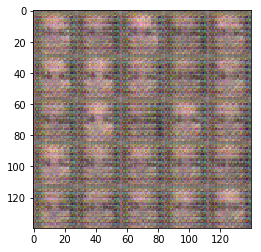

Epoch 1/1... Discriminator Loss: 0.6675... Generator Loss: 1.6158
Epoch 1/1... Discriminator Loss: 0.7401... Generator Loss: 1.7489
Epoch 1/1... Discriminator Loss: 0.7252... Generator Loss: 1.8695
Epoch 1/1... Discriminator Loss: 0.8688... Generator Loss: 1.4936
Epoch 1/1... Discriminator Loss: 0.6284... Generator Loss: 2.3962
Epoch 1/1... Discriminator Loss: 0.6052... Generator Loss: 2.5160
Epoch 1/1... Discriminator Loss: 0.6913... Generator Loss: 1.9462
Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 1.4440
Epoch 1/1... Discriminator Loss: 0.8826... Generator Loss: 1.4826
Epoch 1/1... Discriminator Loss: 0.6777... Generator Loss: 1.6909


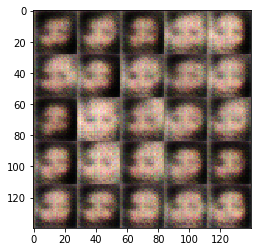

Epoch 1/1... Discriminator Loss: 0.6661... Generator Loss: 1.6862
Epoch 1/1... Discriminator Loss: 0.8300... Generator Loss: 1.5116
Epoch 1/1... Discriminator Loss: 1.0652... Generator Loss: 1.1633
Epoch 1/1... Discriminator Loss: 0.8110... Generator Loss: 1.6355
Epoch 1/1... Discriminator Loss: 0.7108... Generator Loss: 1.8911
Epoch 1/1... Discriminator Loss: 0.8334... Generator Loss: 1.2656
Epoch 1/1... Discriminator Loss: 0.9301... Generator Loss: 1.3643
Epoch 1/1... Discriminator Loss: 0.8808... Generator Loss: 1.4637
Epoch 1/1... Discriminator Loss: 1.1408... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 0.7637... Generator Loss: 1.5849


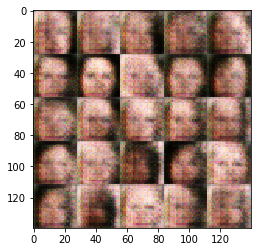

Epoch 1/1... Discriminator Loss: 0.8261... Generator Loss: 1.6287
Epoch 1/1... Discriminator Loss: 0.6456... Generator Loss: 2.1365
Epoch 1/1... Discriminator Loss: 0.7904... Generator Loss: 1.6932
Epoch 1/1... Discriminator Loss: 0.8486... Generator Loss: 1.3799
Epoch 1/1... Discriminator Loss: 0.8241... Generator Loss: 1.5760
Epoch 1/1... Discriminator Loss: 0.5033... Generator Loss: 2.5122
Epoch 1/1... Discriminator Loss: 0.5942... Generator Loss: 2.0679
Epoch 1/1... Discriminator Loss: 0.8622... Generator Loss: 1.5304
Epoch 1/1... Discriminator Loss: 0.8385... Generator Loss: 1.5949
Epoch 1/1... Discriminator Loss: 0.9079... Generator Loss: 1.1822


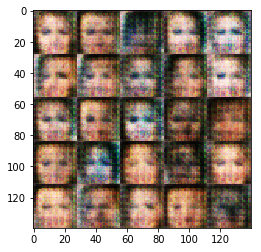

Epoch 1/1... Discriminator Loss: 0.8493... Generator Loss: 1.2941
Epoch 1/1... Discriminator Loss: 0.9408... Generator Loss: 1.4818
Epoch 1/1... Discriminator Loss: 1.1845... Generator Loss: 1.9580
Epoch 1/1... Discriminator Loss: 1.0203... Generator Loss: 1.1752
Epoch 1/1... Discriminator Loss: 1.0709... Generator Loss: 1.0068
Epoch 1/1... Discriminator Loss: 0.8590... Generator Loss: 1.6760
Epoch 1/1... Discriminator Loss: 1.0046... Generator Loss: 1.1186
Epoch 1/1... Discriminator Loss: 1.1224... Generator Loss: 0.9007
Epoch 1/1... Discriminator Loss: 0.7806... Generator Loss: 1.6082
Epoch 1/1... Discriminator Loss: 1.0146... Generator Loss: 1.0926


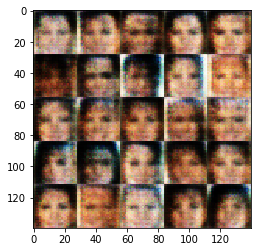

Epoch 1/1... Discriminator Loss: 1.0145... Generator Loss: 1.1373
Epoch 1/1... Discriminator Loss: 1.0967... Generator Loss: 1.0459
Epoch 1/1... Discriminator Loss: 0.9523... Generator Loss: 1.2198
Epoch 1/1... Discriminator Loss: 0.9250... Generator Loss: 1.1457
Epoch 1/1... Discriminator Loss: 0.9952... Generator Loss: 1.0813
Epoch 1/1... Discriminator Loss: 0.9703... Generator Loss: 1.0689
Epoch 1/1... Discriminator Loss: 1.0519... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 1.0019... Generator Loss: 1.2682
Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 1.7695
Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 1.1288


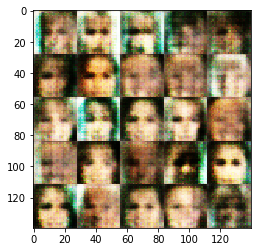

Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 0.9477
Epoch 1/1... Discriminator Loss: 0.9301... Generator Loss: 1.4533
Epoch 1/1... Discriminator Loss: 0.8169... Generator Loss: 1.5719
Epoch 1/1... Discriminator Loss: 0.7133... Generator Loss: 1.7216
Epoch 1/1... Discriminator Loss: 0.8579... Generator Loss: 1.7864
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 1.0097
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 0.9271
Epoch 1/1... Discriminator Loss: 1.1854... Generator Loss: 1.3157
Epoch 1/1... Discriminator Loss: 0.9889... Generator Loss: 1.2802
Epoch 1/1... Discriminator Loss: 0.7503... Generator Loss: 1.5988


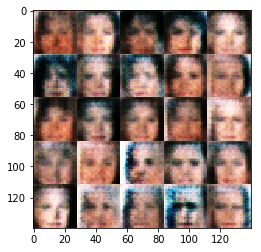

Epoch 1/1... Discriminator Loss: 1.0136... Generator Loss: 1.0951
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 1.0946
Epoch 1/1... Discriminator Loss: 1.0050... Generator Loss: 1.3908
Epoch 1/1... Discriminator Loss: 0.9702... Generator Loss: 1.2777
Epoch 1/1... Discriminator Loss: 0.9935... Generator Loss: 1.1470
Epoch 1/1... Discriminator Loss: 1.1738... Generator Loss: 1.4747
Epoch 1/1... Discriminator Loss: 0.8932... Generator Loss: 1.2341
Epoch 1/1... Discriminator Loss: 1.4312... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 1.2692... Generator Loss: 0.8973
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 1.7260


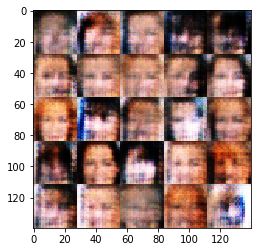

Epoch 1/1... Discriminator Loss: 1.0447... Generator Loss: 1.2255
Epoch 1/1... Discriminator Loss: 1.0959... Generator Loss: 1.0058
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.8391
Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 1.0042
Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 1.0705
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 1.1939
Epoch 1/1... Discriminator Loss: 1.0744... Generator Loss: 1.1977
Epoch 1/1... Discriminator Loss: 1.1363... Generator Loss: 0.9510
Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 1.2661
Epoch 1/1... Discriminator Loss: 1.0949... Generator Loss: 1.1603


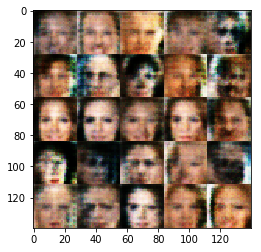

Epoch 1/1... Discriminator Loss: 1.1512... Generator Loss: 1.0245
Epoch 1/1... Discriminator Loss: 1.1408... Generator Loss: 0.8100
Epoch 1/1... Discriminator Loss: 1.1227... Generator Loss: 0.9386
Epoch 1/1... Discriminator Loss: 0.8717... Generator Loss: 1.2305
Epoch 1/1... Discriminator Loss: 1.0659... Generator Loss: 0.8488
Epoch 1/1... Discriminator Loss: 1.0122... Generator Loss: 1.0887
Epoch 1/1... Discriminator Loss: 1.0531... Generator Loss: 1.4583
Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 1.2554
Epoch 1/1... Discriminator Loss: 1.0409... Generator Loss: 1.1609
Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 1.1420


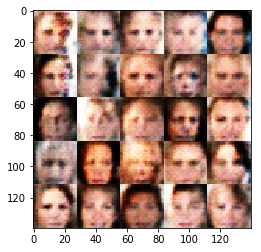

Epoch 1/1... Discriminator Loss: 0.8958... Generator Loss: 1.5136
Epoch 1/1... Discriminator Loss: 0.9834... Generator Loss: 1.3351
Epoch 1/1... Discriminator Loss: 1.1186... Generator Loss: 1.0386
Epoch 1/1... Discriminator Loss: 1.0004... Generator Loss: 1.5680
Epoch 1/1... Discriminator Loss: 0.9874... Generator Loss: 1.0943
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.0000... Generator Loss: 1.4955
Epoch 1/1... Discriminator Loss: 1.0121... Generator Loss: 1.1362
Epoch 1/1... Discriminator Loss: 1.0695... Generator Loss: 0.8339
Epoch 1/1... Discriminator Loss: 1.0863... Generator Loss: 0.8709


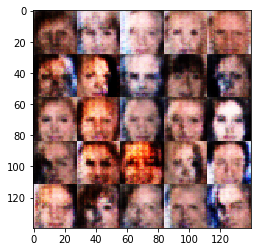

Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 1.1717
Epoch 1/1... Discriminator Loss: 1.0767... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 1.0088... Generator Loss: 1.2706
Epoch 1/1... Discriminator Loss: 1.0433... Generator Loss: 0.9714
Epoch 1/1... Discriminator Loss: 1.0656... Generator Loss: 1.2846
Epoch 1/1... Discriminator Loss: 1.0465... Generator Loss: 1.1976
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 1.0108
Epoch 1/1... Discriminator Loss: 0.9974... Generator Loss: 1.0135
Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 0.9408... Generator Loss: 1.5128


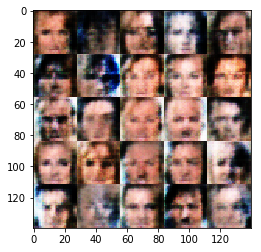

Epoch 1/1... Discriminator Loss: 1.1681... Generator Loss: 0.9036
Epoch 1/1... Discriminator Loss: 1.0492... Generator Loss: 1.1490
Epoch 1/1... Discriminator Loss: 1.1312... Generator Loss: 0.8505
Epoch 1/1... Discriminator Loss: 1.0509... Generator Loss: 1.2712
Epoch 1/1... Discriminator Loss: 1.2206... Generator Loss: 1.3366
Epoch 1/1... Discriminator Loss: 1.1286... Generator Loss: 0.9828
Epoch 1/1... Discriminator Loss: 1.0578... Generator Loss: 1.6664
Epoch 1/1... Discriminator Loss: 0.9489... Generator Loss: 1.3517
Epoch 1/1... Discriminator Loss: 0.9892... Generator Loss: 1.0120
Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 1.2370


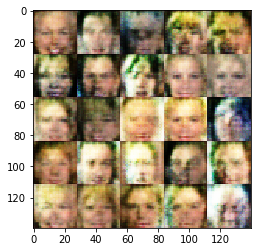

Epoch 1/1... Discriminator Loss: 1.0599... Generator Loss: 0.9291
Epoch 1/1... Discriminator Loss: 1.0606... Generator Loss: 0.9197
Epoch 1/1... Discriminator Loss: 1.1098... Generator Loss: 0.8459
Epoch 1/1... Discriminator Loss: 1.0322... Generator Loss: 1.1030
Epoch 1/1... Discriminator Loss: 1.0578... Generator Loss: 1.0528
Epoch 1/1... Discriminator Loss: 1.2236... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 1.0380... Generator Loss: 0.9449
Epoch 1/1... Discriminator Loss: 0.8162... Generator Loss: 1.3773
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 1.3869
Epoch 1/1... Discriminator Loss: 0.9212... Generator Loss: 1.1796


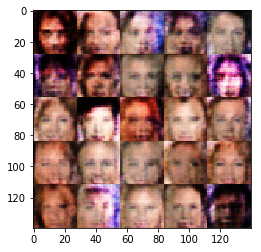

Epoch 1/1... Discriminator Loss: 1.2359... Generator Loss: 1.1691
Epoch 1/1... Discriminator Loss: 0.9987... Generator Loss: 1.3168
Epoch 1/1... Discriminator Loss: 0.9889... Generator Loss: 1.3957
Epoch 1/1... Discriminator Loss: 0.9877... Generator Loss: 1.3886
Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 1.4282
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 1.4392
Epoch 1/1... Discriminator Loss: 1.0135... Generator Loss: 1.8100
Epoch 1/1... Discriminator Loss: 1.0246... Generator Loss: 1.4192
Epoch 1/1... Discriminator Loss: 0.9810... Generator Loss: 2.1262
Epoch 1/1... Discriminator Loss: 0.9773... Generator Loss: 1.5796


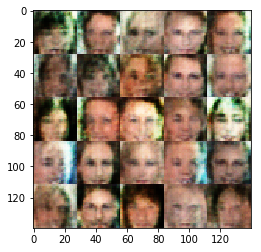

Epoch 1/1... Discriminator Loss: 1.1328... Generator Loss: 0.9286
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 0.9645
Epoch 1/1... Discriminator Loss: 1.0234... Generator Loss: 1.2135
Epoch 1/1... Discriminator Loss: 1.0971... Generator Loss: 1.1075
Epoch 1/1... Discriminator Loss: 1.0772... Generator Loss: 0.8230
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 0.9815
Epoch 1/1... Discriminator Loss: 1.1259... Generator Loss: 1.2318
Epoch 1/1... Discriminator Loss: 1.0551... Generator Loss: 1.0126


In [18]:
batch_size = 128
z_dim = 128
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

In [19]:
t1 = time.time()

print('{:.4f} seconds to train the GAN on CelebA data.'.format(t1-t0))

427.5021 seconds to train the GAN on CelebA data.


### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.